<a href="https://www.kaggle.com/code/sarthak02gupta/adam-doctor-handwriting?scriptVersionId=104217047" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import keras
import keras.layers as L
import keras.models as M
import tensorflow as tf
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import Sequence

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install matplotlib
import os

In [3]:
import pickle


In [4]:
#import shutil
#shutil.rmtree("./train")

In [5]:
#import os
#os.remove("./train")

In [6]:

train=pd.read_csv('../input/iam-dataset/iam_dataset/train_gt.txt',sep='\t')
train.columns = ['FILENAME', 'IDENTITY']
train.to_csv('train_gt.csv', 
                  index = None)
train.dropna(inplace=True)
train

,FILENAME,IDENTITY
0,words/a01/a01-000u/a01-000u-00-01.png,MOVE
1,words/a01/a01-000u/a01-000u-00-02.png,to
2,words/a01/a01-000u/a01-000u-00-03.png,stop
3,words/a01/a01-000u/a01-000u-00-04.png,Mr.
4,words/a01/a01-000u/a01-000u-00-05.png,Gaitskell
...,...,...
92248,words/m01/m01-079/m01-079-06-02.png,beat
92249,words/m01/m01-079/m01-079-06-03.png,in
92250,words/m01/m01-079/m01-079-06-04.png,death
92251,words/m01/m01-079/m01-079-06-05.png,.


In [7]:
validation=pd.read_csv('../input/iam-dataset/iam_dataset/val_gt.txt',sep='\t')
validation.columns = ['FILENAME', 'IDENTITY']
validation.to_csv('val_gt.csv', 
                  index = None)
validation.dropna(inplace=True)
validation

,FILENAME,IDENTITY
0,words/m01/m01-084/m01-084-00-02.png,","
1,words/m01/m01-084/m01-084-00-03.png,deadly
2,words/m01/m01-084/m01-084-00-04.png,portent
3,words/m01/m01-084/m01-084-00-05.png,!
4,words/m01/m01-084/m01-084-01-00.png,Steve
...,...,...
23058,words/r06/r06-143/r06-143-04-06.png,him
23059,words/r06/r06-143/r06-143-04-07.png,in
23060,words/r06/r06-143/r06-143-04-08.png,the
23061,words/r06/r06-143/r06-143-04-09.png,garden


In [8]:
train['Length']=train['IDENTITY'].apply(lambda x : len(str(x)))
train=train[train['Length']<=10]
train[train['Length']==max(train['Length'])]

,FILENAME,IDENTITY,Length
6,words/a01/a01-000u/a01-000u-01-00.png,nominating,10
31,words/a01/a01-000u/a01-000u-04-03.png,resolution,10
48,words/a01/a01-000u/a01-000u-06-04.png,Manchester,10
58,words/a01/a01-000x/a01-000x-00-07.png,nominating,10
83,words/a01/a01-000x/a01-000x-03-05.png,resolution,10
...,...,...,...
92126,words/m01/m01-060/m01-060-00-08.png,reverently,10
92140,words/m01/m01-060/m01-060-02-03.png,Isn&apos;t,10
92188,words/m01/m01-079/m01-079-00-02.png,precaution,10
92199,words/m01/m01-079/m01-079-01-04.png,pedestrian,10


In [9]:
validation['Length']=validation['IDENTITY'].apply(lambda x : len(str(x)))
validation=validation[validation['Length']<=10]
validation[validation['Length']==max(validation['Length'])]

,FILENAME,IDENTITY,Length
21,words/m01/m01-084/m01-084-03-02.png,lighted-up,10
65,words/m01/m01-090/m01-090-00-07.png,repetition,10
153,words/m01/m01-095/m01-095-01-06.png,screeching,10
277,words/m01/m01-104/m01-104-00-10.png,presumably,10
323,words/m01/m01-104/m01-104-04-11.png,don&apos;t,10
...,...,...,...
22960,words/r06/r06-137/r06-137-06-00.png,absolutely,10
22965,words/r06/r06-137/r06-137-06-05.png,can&apos;t,10
22987,words/r06/r06-137/r06-137-08-05.png,don&apos;t,10
22994,words/r06/r06-137/r06-137-09-02.png,don&apos;t,10


In [10]:
train=train.sample(frac=0.8,random_state=42)
validation=validation.sample(frac=0.1)

In [11]:
characters=set()
train['IDENTITY']=train['IDENTITY'].apply(lambda x: str(x))
for i in train['IDENTITY'].values:
    for j in i :
        if j not in characters :
            characters.add(j)
characters=sorted(characters)
characters

['!',
 '#',
 '&',
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [12]:
# 2 Dictionaries  :   Turn all ur characters to num and vice versa
char_to_label = {char:label for label,char in enumerate(characters)}
label_to_char = {label:char for label,char in enumerate(characters)}

In [13]:
import os
os.mkdir('./train')


In [14]:
for x in train['FILENAME']:
    filepath='../input/iam-dataset/iam_dataset/'+ x
    image= cv2.imread(filepath)
    y=x.split('/')[-1]
    cv2.imwrite(os.path.join('./train',y),image)

In [15]:
#import shutil
#shutil.rmtree("./validate")
os.mkdir('./validate')

In [16]:
for x in validation['FILENAME']:
    filepath='../input/iam-dataset/iam_dataset/'+ x
    image= cv2.imread(filepath)
    y=x.split('/')[-1]
    cv2.imwrite(os.path.join('./validate',y),image)

In [17]:
path_train='./train'
path_validation='./validate'

In [18]:
# Data Generator
class DataGenerator(Sequence):
    def __init__(self,dataframe,path,char_map,batch_size=32,img_size=(256,64),
                 downsample_factor=4,max_length=10,shuffle=False):
        self.dataframe=dataframe
        self.path=path
        self.char_map=char_map
        self.batch_size=batch_size
        self.width=img_size[0]
        self.height=img_size[1]
        self.downsample_factor=downsample_factor
        self.max_length=max_length
        self.shuffle=shuffle
        self.indices = np.arange(len(dataframe))
        self.on_epoch_end()
        
    def __len__(self):
        return len(self.dataframe)//self.batch_size
    
    def __getitem__(self,idx):
        curr_batch_idx=self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_images=np.ones((self.batch_size,self.width,self.height,1),dtype=np.float32)
        batch_labels=np.ones((self.batch_size,self.max_length),dtype=np.float32)
        input_length=np.ones((self.batch_size,1),dtype=np.float32)*(self.width//self.downsample_factor-2)
        label_length=np.zeros((self.batch_size,1),dtype=np.int64)
        for i,idx in enumerate(curr_batch_idx):
            img_path=self.dataframe['FILENAME'].values[idx]
            img_path=img_path.split('/')[-1]
            img_path=self.path+'/'+img_path
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(self.width,self.height))
            img=(img/255).astype(np.float32)
            img=img.T
            img=np.expand_dims(img,axis=-1)
            text=self.dataframe['IDENTITY'].values[idx]
            text=str(text)
            label=[]
            for j in text: 
                if j in self.char_map :
                    label.append(self.char_map[j])
                else:
                    label.append(100)
            label.extend([100]*(10-len(label)))
            batch_images[i]=img
            batch_labels[i]=label
            label_length[i]=len(label)
        batch_inputs= {
                'input_data':batch_images,
                'input_label':batch_labels,
                'input_length':input_length,
                'label_length':label_length
                
            }
        return batch_inputs,np.zeros((self.batch_size),dtype=np.float32)
    def on_epoch_end(self):
        if self.shuffle == True :
            np.random.shuffle(self.indices)
        

In [19]:

train_generator=DataGenerator(train,path_train,char_to_label)
validation_generator=DataGenerator(validation,path_validation,char_to_label)
print(len(train_generator))

2237


In [20]:
# Making CTC Function
class CTCLayer(L.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        
        # On test time, just return the computed loss
        return loss

In [21]:
# Making the Model now
def make_model():
    inp=L.Input(shape=(256,64,1),dtype=np.float32,name='input_data')
    labels=L.Input(shape=[10],dtype=np.float32,name='input_label')
    input_length=L.Input(shape=[1],dtype=np.int64,name='input_length')
    label_length=L.Input(shape=[1],dtype=np.int64,name='label_length')
    x=L.Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_normal')(inp)
    x=L.MaxPooling2D(pool_size=(2,2))(x)
    x=L.Dropout(0.3)(x)
    x=L.Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_normal')(x)
    x=L.MaxPooling2D(pool_size=(2,2))(x)
    x=L.Dropout(0.3)(x)
    new_shape=((256//4),(64//4)*128)
    x=L.Reshape(new_shape)(x)
    x=L.Dense(64,activation='relu')(x)
    x=L.Dropout(0.2)(x)
    x=L.Bidirectional(L.LSTM(128,return_sequences=True))(x)
    x=L.Bidirectional(L.LSTM(64,return_sequences=True))(x)
    x=L.Dense(len(characters)+1,activation='softmax',kernel_initializer='he_normal',name='Dense_output')(x)
    output=CTCLayer(name='outputs')(labels,x,input_length,label_length)
    model=M.Model([inp,labels,input_length,label_length],output)
    # Optimizer
    adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
    model.compile(optimizer=adam)
    return model

In [22]:
model=make_model()
model.summary()

2022-08-26 01:12:26.429830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 01:12:26.526159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 01:12:26.526920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 01:12:26.528938: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 256, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 64, 64)  640         input_data[0][0]                 
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 32, 64)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 32, 64)  0           max_pooling2d[0][0]              
______________________________________________________________________________________________

In [23]:
# Add early stopping
#es = keras.callbacks.EarlyStopping(monitor='val_loss',
                          #         patience=5,
                                #   restore_best_weights=True)

# Train the model
#if 'prediction_model_ocr.h5' not in os.listdir('./'):
  #  history = model.fit(train_generator,steps_per_epoch=1000,validation_data=validation_generator,
   #                     epochs=8)


In [24]:
#if 'prediction_model_ocr.h5' not in os.listdir('./'):
 #   history = model.fit(train_generator,steps_per_epoch=1000,validation_data=validation_generator,
  #                      epochs=12)

In [25]:
#if 'prediction_model_ocr.h5' not in os.listdir('./'):
 #   history = model.fit(train_generator,steps_per_epoch=1000,validation_data=validation_generator,
  #                      epochs=10)

In [26]:
#if 'prediction_model_ocr.h5' not in os.listdir('./'):
 #   history = model.fit(train_generator,steps_per_epoch=1000,validation_data=validation_generator,
  #                      epochs=10)

In [27]:
#if 'prediction_model_ocr.h5' not in os.listdir('./'):
 #   history = model.fit(train_generator,steps_per_epoch=1000,validation_data=validation_generator,
  #                      epochs=2)

In [28]:
prediction_model=M.load_model('../input/weights/prediction_model_ocr (1).h5')

import csv
import glob
f=open("train.csv","w")
#create a CSV writer
writer = csv.writer(f)
#write a row to add headers
writer.writerow(["FILENAME", "IDENTITY"])
for i in glob.glob('../input/inputter/final (1)/*'):
    writer.writerow([i, i.split('_')[-1].rstrip('.jpg')])
    
train1=pd.read_csv('./train.csv',sep='\t',nrows=100)

train1.columns = ['FILENAME', 'IDENTITY']
train1.to_csv('train_gt1.csv', 
                  index = None)
train1.dropna(inplace=True)
train1

validation1=pd.read_csv('./train.csv',sep='\t',skiprows=100)
validation1.columns = ['FILENAME', 'IDENTITY']
validation1.to_csv('val_gt1.csv', 
                  index = None)
validation1.dropna(inplace=True)
validation1


import types
import tempfile
import keras.models

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            keras.models.save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = { 'model_str': model_str }
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = keras.models.load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = keras.models.Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

make_keras_picklable()

import joblib
prediction_model = keras.models.Model(model.get_layer(name='input_data').input,
                                        model.get_layer(name='Dense_output').output)
prediction_model.summary()
filename = 'finalized_model1.pickle'
joblib.dump(model, filename)

model_json = prediction_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [29]:
if 'prediction_model_ocr.h5' not in os.listdir('./'):
    prediction_model.save('prediction_model_ocr.h5')
    prediction_model=M.load_model('prediction_model_ocr.h5')

In [30]:
label_to_char[100]=''

In [31]:
# A utility to decode the output of the network
def decode_batch_predictions(pred):
    pred = pred[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]
    
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, 
                                        input_length=input_len,
                                        greedy=True)[0][0]
    
    # Iterate over the results and get back the text
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += label_to_char[c]
        output_text.append(outstr)
    
    # return final text results
    return output_text

2022-08-26 01:12:32.770969: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-26 01:12:34.817352: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Ground truth: , 	 Predicted: ,
Ground truth: a 	 Predicted: a
Ground truth: , 	 Predicted: ,
Ground truth: 10 	 Predicted: to
Ground truth: get 	 Predicted: get
Ground truth: advice 	 Predicted: adice
Ground truth: sharply 	 Predicted: sharply
Ground truth: the 	 Predicted: the
Ground truth: Nigel 	 Predicted: Nigel
Ground truth: Gave 	 Predicted: Gave
Ground truth: This 	 Predicted: This
Ground truth: your 	 Predicted: your
Ground truth: one 	 Predicted: ome
Ground truth: Not 	 Predicted: Nat
Ground truth: flick 	 Predicted: Hhick
Ground truth: he 	 Predicted: he
Ground truth: of 	 Predicted: of
Ground truth: be 	 Predicted: belis
Ground truth: he 	 Predicted: o
Ground truth: &apos; 	 Predicted: &;
Ground truth: an 	 Predicted: an
Ground truth: he 	 Predicted: he
Ground truth: whether 	 Predicted: whithr
Ground truth: battered 	 Predicted: babtered
Ground truth: , 	 Predicted: ,
Ground truth: about 	 Predicted: about
Ground truth: , 	 Predicted: .
Ground truth: I 	 Predicted: I
Ground

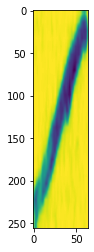

In [32]:
for p, (inp_value, _) in enumerate(validation_generator):
    bs = inp_value['input_data'].shape[0]
    X_data = inp_value['input_data']
    labels = inp_value['input_label']
    plt.imshow(X_data[0])
    preds = prediction_model.predict(X_data)
    pred_texts = decode_batch_predictions(preds)
    
    
    orig_texts = []
    for label in labels:
        text = ''.join([label_to_char[int(x)] for x in label])
        orig_texts.append(text)
        
    for i in range(bs):
        print(f'Ground truth: {orig_texts[i]} \t Predicted: {pred_texts[i]}')
    break

In [33]:
def prescription_out(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.figure()
    
    def thresholding(image):
        img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        ret,thresh=cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
        plt.imshow(thresh,cmap='gray')
        return thresh
    thresh_img=thresholding(img)

#To detect individual lines for segmentating the word
    kernel=np.ones((3,85),np.uint8)
    dilated=cv2.dilate(thresh_img,kernel,iterations=1)
    plt.imshow(dilated,cmap='gray')
    plt.figure()
    (contours,heiarchy)=cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    sorted_contours_lines=sorted(contours, key=lambda ctr:cv2.boundingRect(ctr)[1]) 
#(1=SOrting Vertically,0=Sorting Horizontally)


    img2=img.copy()
    for ctr in sorted_contours_lines:
        x,y,w,h=cv2.boundingRect(ctr)
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,0,255),2)
    plt.imshow(img2)
    plt.figure()


    kernel=np.ones((3,15),np.uint8)
    dilated=cv2.dilate(thresh_img
                       ,kernel,iterations=1)
    plt.imshow(dilated,cmap='gray')
    plt.figure()

    img3=img.copy()
    word_list=[]
    for line in sorted_contours_lines:
        x,y,w,h=cv2.boundingRect(line)
        #Finding ROI of each line
        roi_line=dilated[y:y+w,x:x+w]
        #Drawing Contours on each word
        (cnt,heiarchy)=cv2.findContours(roi_line.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        sorted_contours_lines=sorted(cnt, key=lambda cntr:cv2.boundingRect(cntr)[0])
    
        for word in sorted_contours_lines:
            if cv2.contourArea(word)<100:
                continue
            x2,y2,w2,h2=cv2.boundingRect(word)
            word_list.append([x+x2,y+y2,x+x2+w2,y+y2+h2])
            cv2.rectangle(img3,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(255,0,0),2)

    plt.imshow(img3)
    plt.figure()
    return word_list

In [34]:
def prescription_resultword(path):
    word_list=prescription_out(path)
    img=cv2.imread(path)
    os.mkdir('./segout3')
    count=0
    li=[]
    for i in word_list:
    
        word=i
        roi_17=img[word[1]:word[3],word[0]:word[2]]
        cv2.imwrite(os.path.join('./segout1',str(count)+'.jpg'),roi_17)
        count=count+1
        plt.imshow(roi_17)
        plt.figure()
    import glob
    for i in glob.glob('./segout3/*'):
        li.append(output(i))
    return li

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


[]

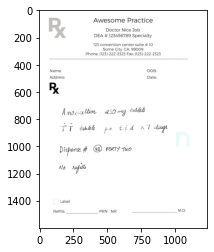

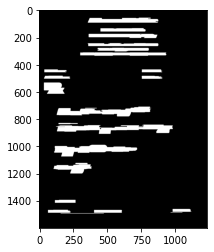

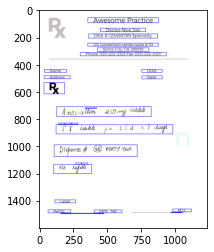

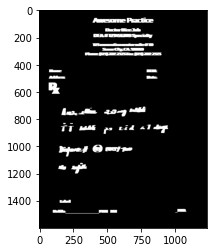

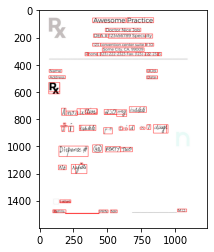

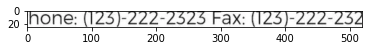

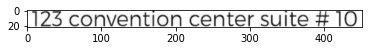

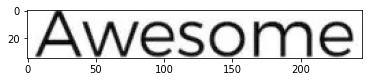

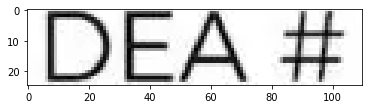

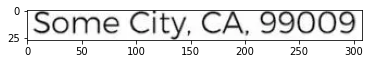

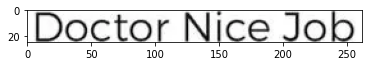

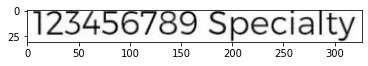

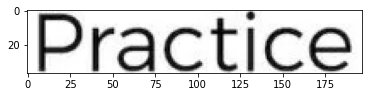

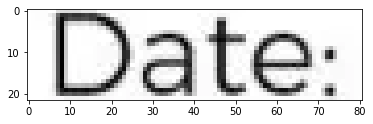

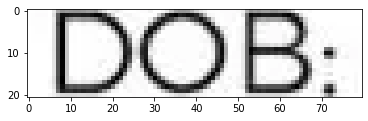

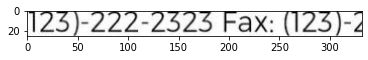

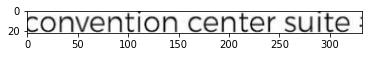

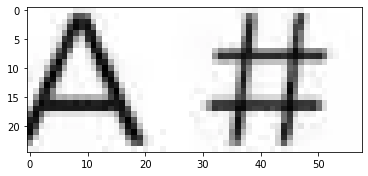

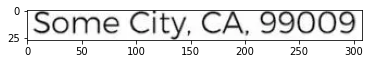

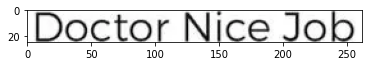

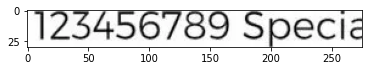

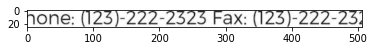

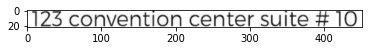

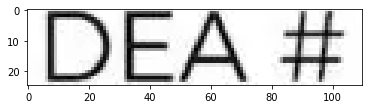

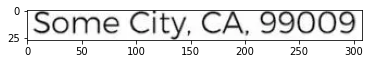

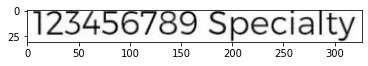

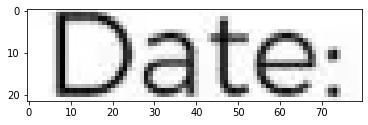

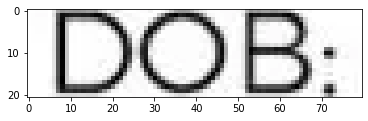

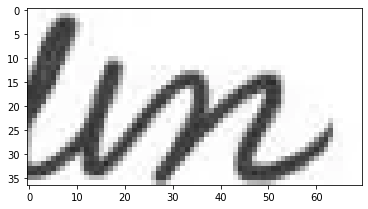

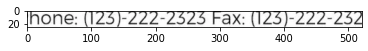

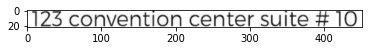

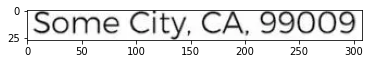

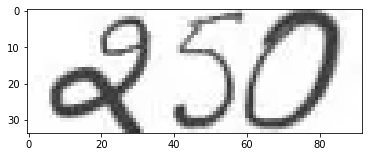

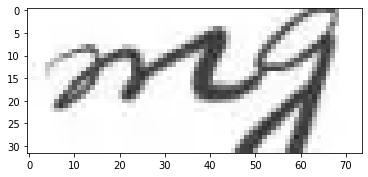

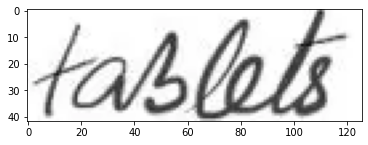

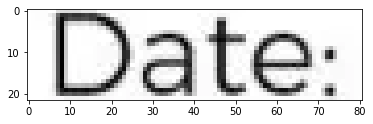

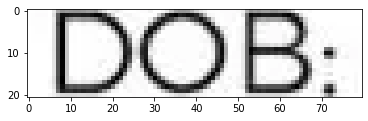

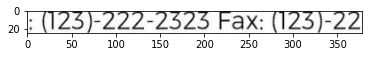

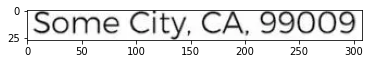

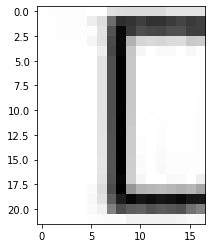

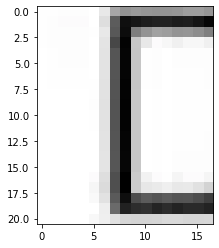

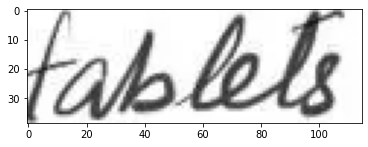

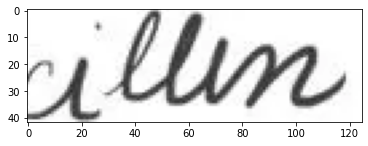

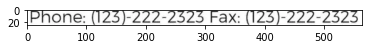

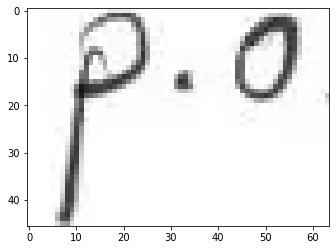

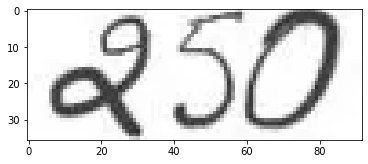

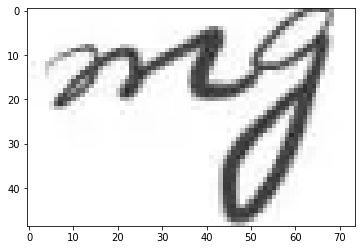

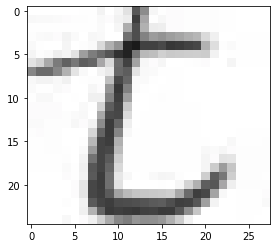

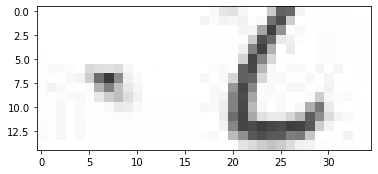

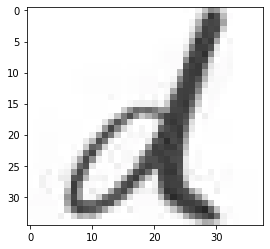

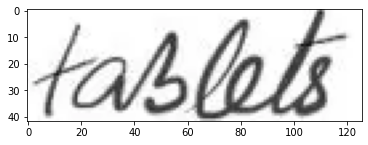

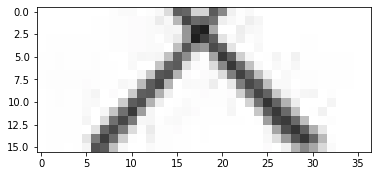

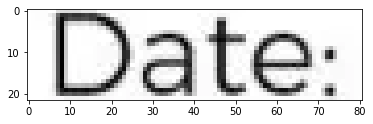

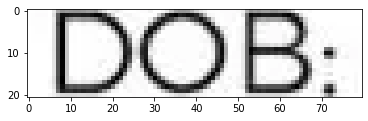

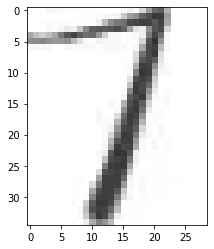

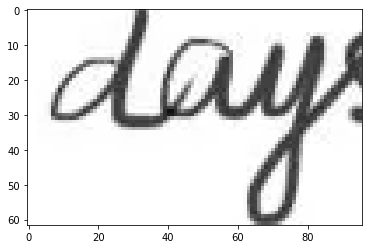

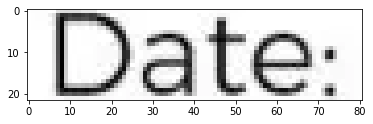

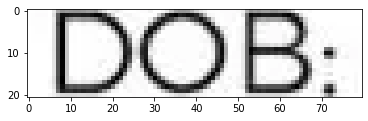

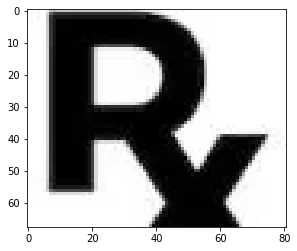

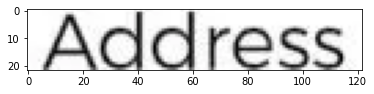

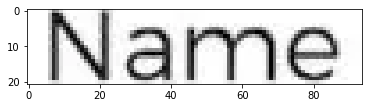

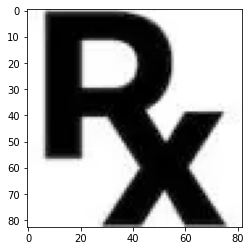

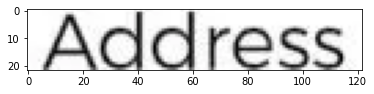

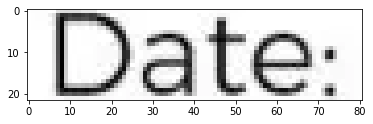

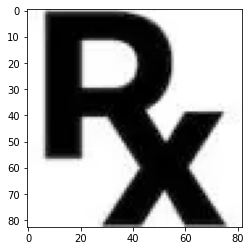

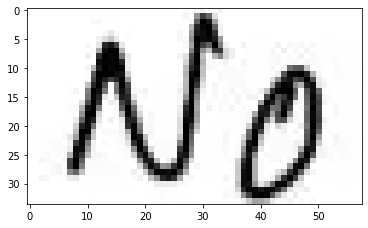

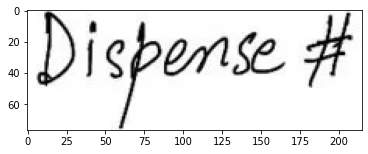

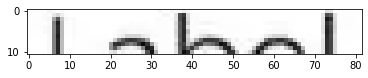

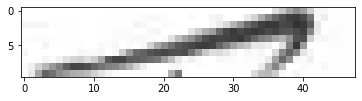

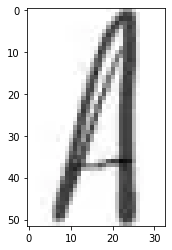

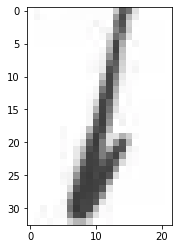

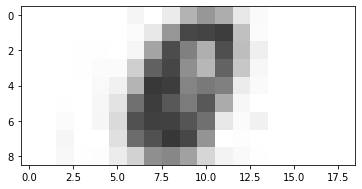

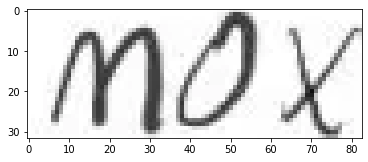

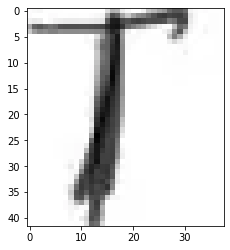

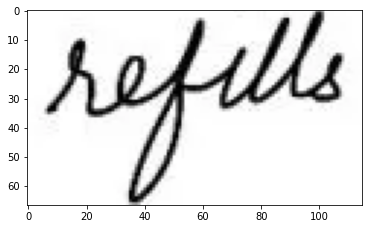

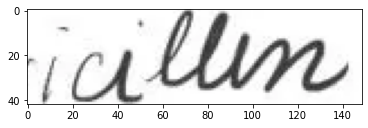

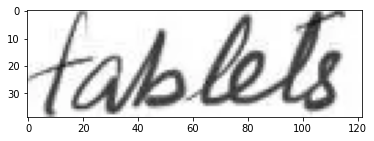

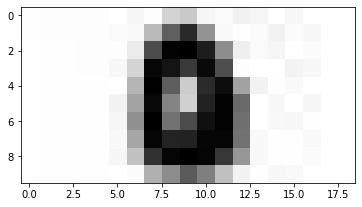

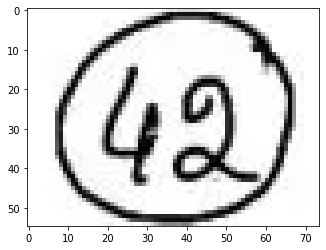

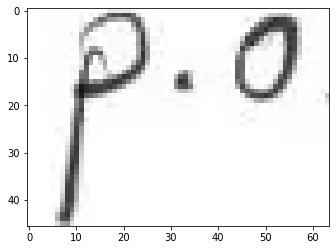

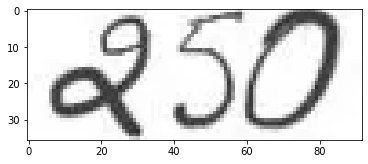

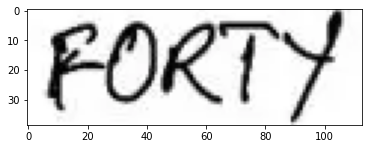

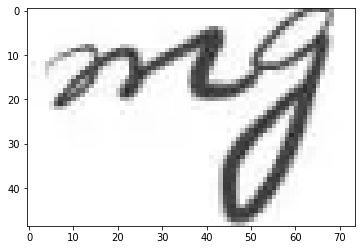

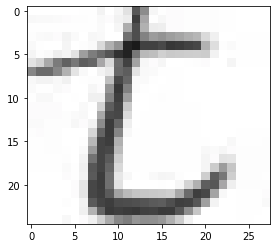

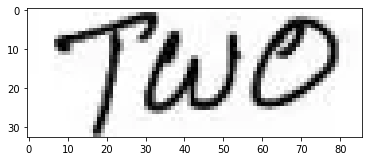

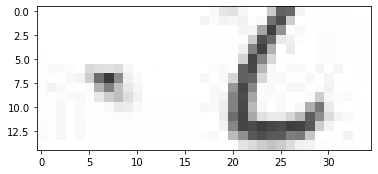

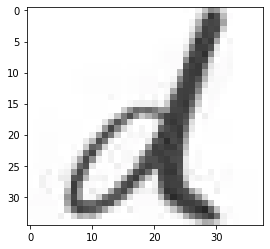

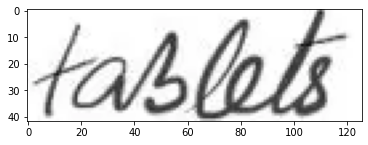

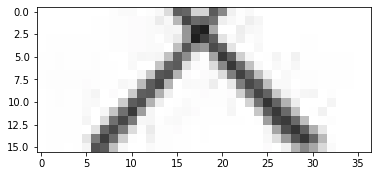

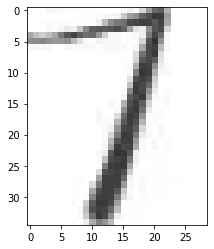

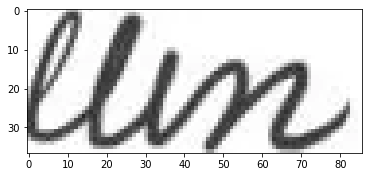

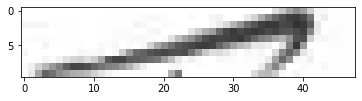

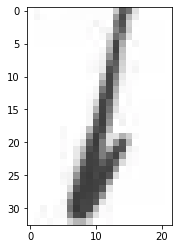

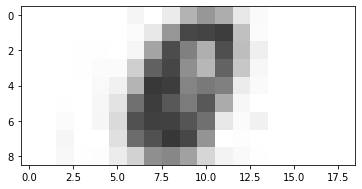

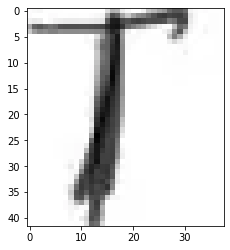

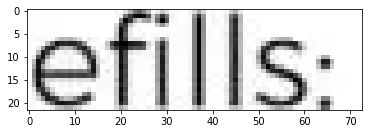

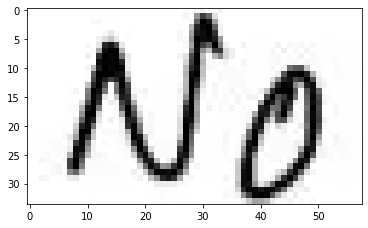

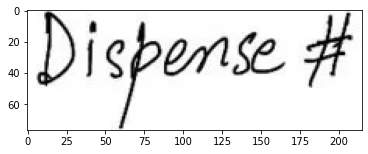

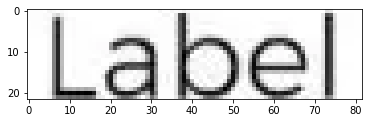

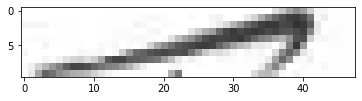

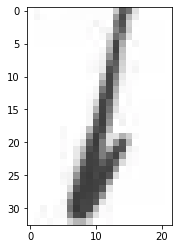

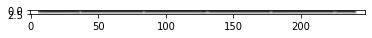

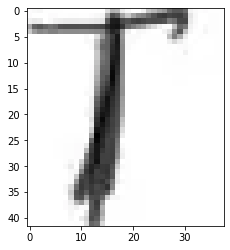

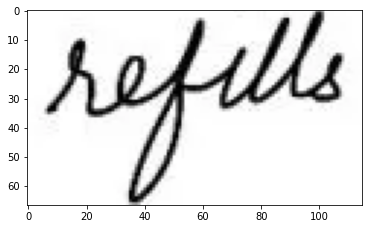

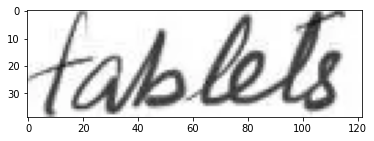

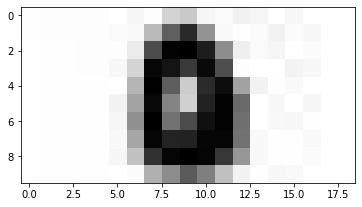

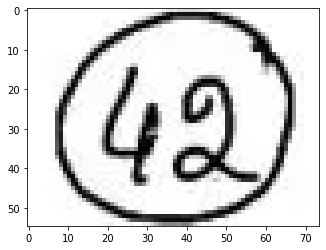

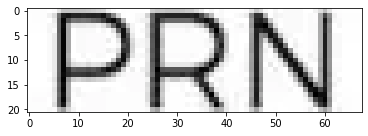

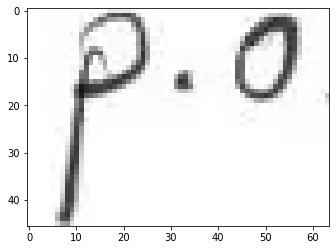

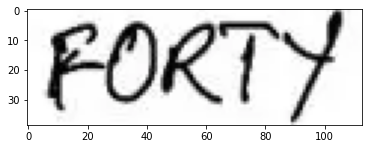

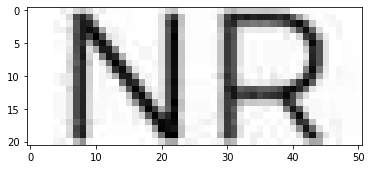

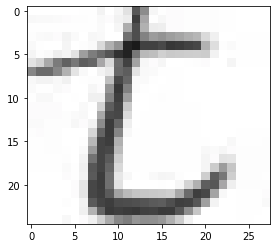

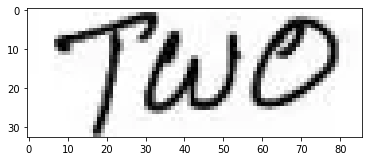

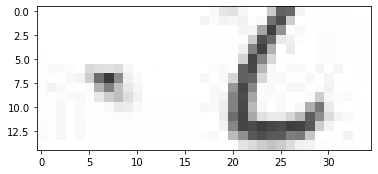

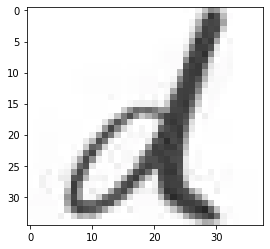

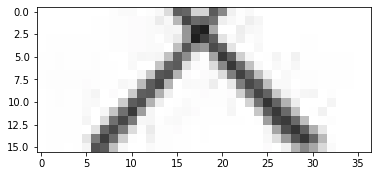

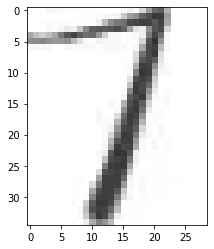

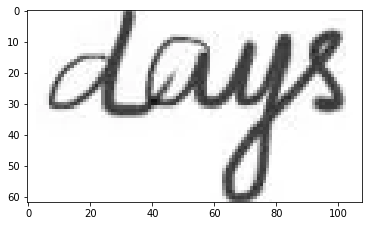

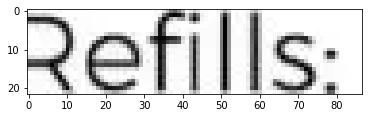

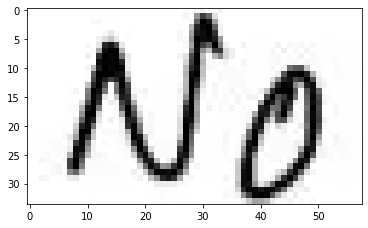

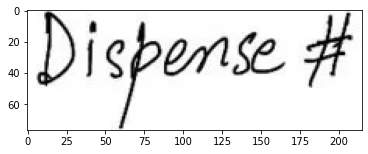

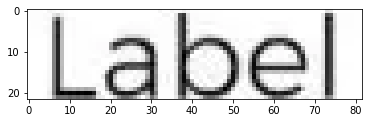

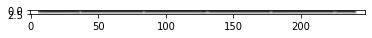

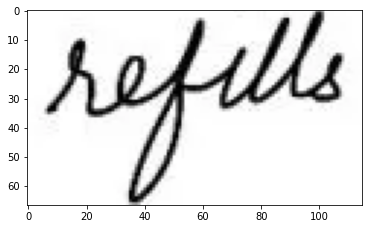

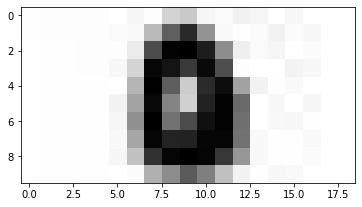

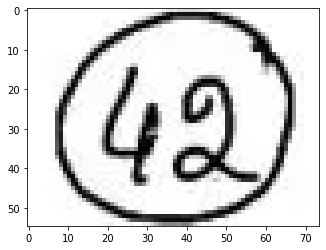

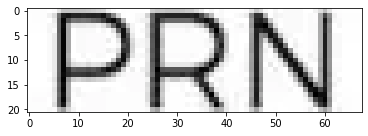

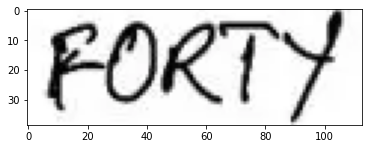

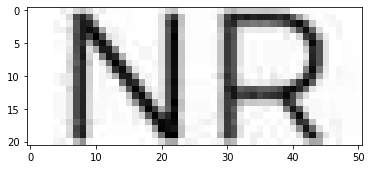

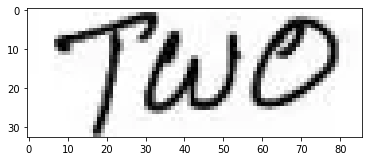

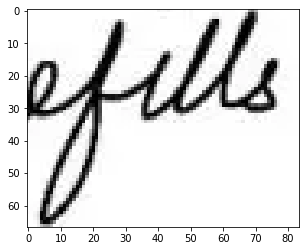

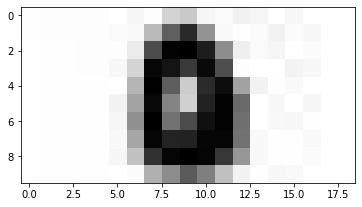

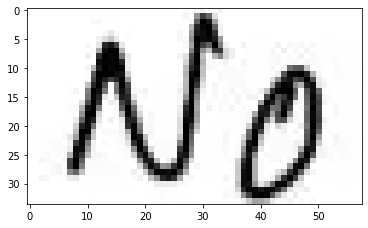

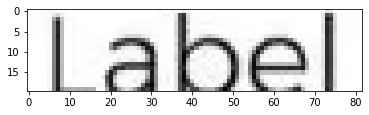

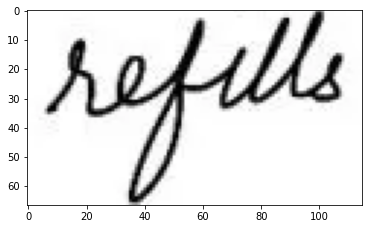

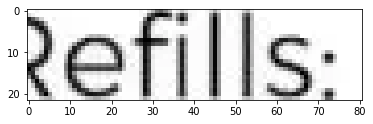

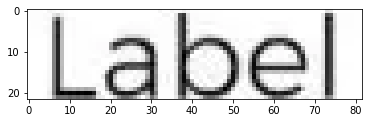

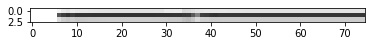

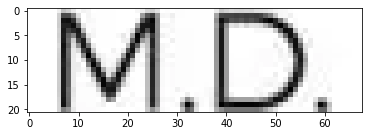

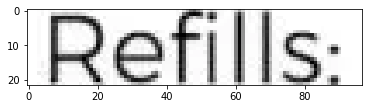

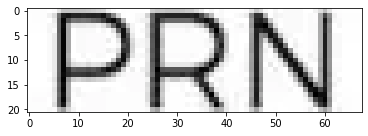

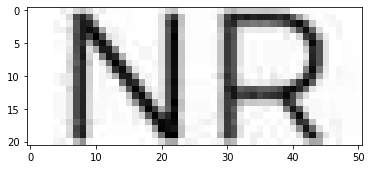

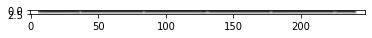

<Figure size 432x288 with 0 Axes>

In [35]:
prescription_resultword('../input/prescrip/drbeen-sample-prescription-copy-2.webp')

Predicted Text: ye


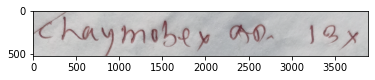

In [36]:
batch_images=np.ones((128,256,64,1),dtype=np.float32)
img=cv2.imread('../input/vnsdlnv/0_Chaymobex AP 1Bx.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(256,64))
img=(img/255).astype(np.float32)
img=img.T
img=np.expand_dims(img,axis=-1)
batch_images[0]=img
x=prediction_model.predict(batch_images)
pred_texts = decode_batch_predictions(x)
pred_texts = pred_texts[0]
im=cv2.imread('../input/vnsdlnv/0_Chaymobex AP 1Bx.jpg')
plt.imshow(im)
print('Predicted Text:',pred_texts)

In [37]:
def output(path):
    batch_images=np.ones((128,256,64,1),dtype=np.float32)
    img=cv2.imread(path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img=cv2.resize(img,(256,64))
    img=(img/255).astype(np.float32)
    img=img.T
    img=np.expand_dims(img,axis=-1)
    batch_images[0]=img
    x=prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(x)
    pred_texts = pred_texts[0]
    im=cv2.imread(path)
    plt.imshow(im)
    plt.figure()
    plt.show()
    print('Predicted Text:',pred_texts)
    return pred_texts

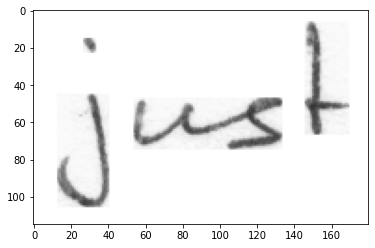

<Figure size 432x288 with 0 Axes>

Predicted Text: jnst


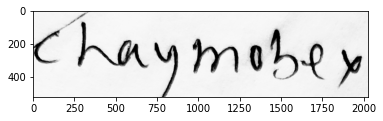

<Figure size 432x288 with 0 Axes>

Predicted Text: chaymoney


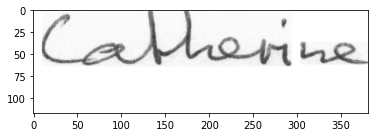

<Figure size 432x288 with 0 Axes>

Predicted Text: latherine


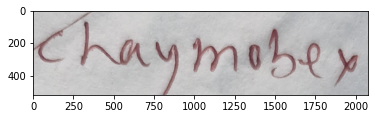

<Figure size 432x288 with 0 Axes>

Predicted Text: cayme


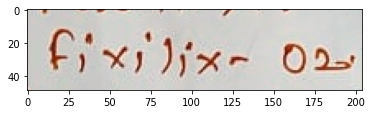

<Figure size 432x288 with 0 Axes>

Predicted Text: Fait-os


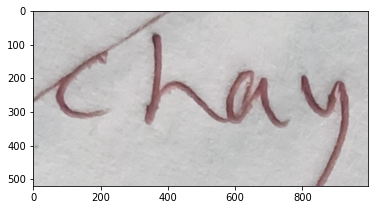

<Figure size 432x288 with 0 Axes>

Predicted Text: oyy


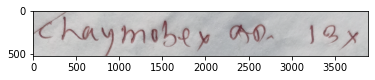

<Figure size 432x288 with 0 Axes>

Predicted Text: ye


In [38]:
import glob
for i in glob.glob('../input/vnsdlnv/*'):
    output(i)

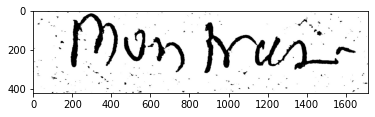

<Figure size 432x288 with 0 Axes>

Predicted Text: ifomasi


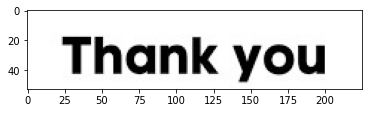

<Figure size 432x288 with 0 Axes>

Predicted Text: rmnanxpo


In [39]:
import glob
for i in glob.glob('../input/giyggi/*'):
    output(i)

Predicted Text: Bannay


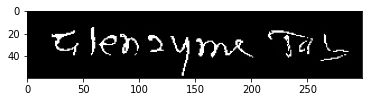

In [40]:
batch_images=np.ones((128,256,64,1),dtype=np.float32)
img=cv2.imread('../input/kjrlngerngw/d1.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(256,64))
img=(img/255).astype(np.float32)
img=img.T
img=np.expand_dims(img,axis=-1)
batch_images[0]=img
x=prediction_model.predict(batch_images)
pred_texts = decode_batch_predictions(x)
pred_texts = pred_texts[0]
im=cv2.imread('../input/kjrlngerngw/d1.jpg')
plt.imshow(im)
print('Predicted Text:',pred_texts)

In [41]:
#!pip install --user Flask

from math import expm1

import joblib
import pandas as pd
from flask import Flask, jsonify, request
from tensorflow import keras

app = Flask(__name__)
model = keras.models.load_model("../input/weights90epoch/prediction_model_ocrf.h5")
import shutil
shutil.rmtree("./prediction")
os.mkdir('./prediction')
path='./prediction'
@app.route("/", methods=["get"])

@app.route("/predict", methods=["POST"])
def index():
    data = request.json
    img=cv2.imread(data)
    cv2.imwrite(os.path.join(path,'1.jpg'),data)
    
    return jsonify(prescription_resultword('./prediction/1.jpg'))

if '__name__'=='__main__':
    app.run(host='localhost',port=5000,debug=True)